In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/bhavesjain/amex-default-prediction/test-last-rows.csv
/kaggle/input/d/bhavesjain/amex-default-prediction/test_v1.parquet
/kaggle/input/d/bhavesjain/amex-default-prediction/train_v2.parquet
/kaggle/input/d/bhavesjain/amex-default-prediction/train-last-rows.csv
/kaggle/input/d/bhavesjain/amex-default-prediction/test_v2.parquet
/kaggle/input/d/bhavesjain/amex-default-prediction/train_v1.parquet
/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [2]:
train_df_y=pd.read_csv("../input/d/bhavesjain/amex-default-prediction/train-last-rows.csv")

lab=pd.read_csv("../input/amex-default-prediction/train_labels.csv")

ss=pd.read_csv("../input/amex-default-prediction/sample_submission.csv")

In [3]:
#np.array(train_df_x.target.values).all==np.array(train_df_y.target.values).all

In [4]:
train_df_y=pd.merge(train_df_y,lab,how="inner")

In [5]:
train_df_y.fillna(train_df_y.mode().iloc[0],inplace=True)

In [6]:
train_df_y.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,0.003973,0.004186,0.005702,0.006210,0.002715,0.007186,0.004234,0.002970,0.008533,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,...,0.002943,0.002202,0.001928,0.002996,0.001701,0.002980,0.007479,0.003169,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880875,0.009704,0.004284,0.812650,0.006450,-0.508883,0.003796,0.007196,...,0.004133,0.002654,0.003470,0.009881,0.007691,0.007383,0.006623,0.000834,0.003444,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,...,0.004254,0.000060,0.004576,0.001789,0.005140,0.002704,0.006184,0.005560,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.871900,0.005573,0.007679,0.815746,0.001247,-0.508883,0.000231,0.005528,...,0.001068,1.006119,0.008897,0.005045,0.003706,0.002974,0.004162,0.006944,0.000905,0


In [7]:
#train_df= pd.merge(train_df_x,train_df_y,on="customer_ID")

In [8]:
!pip install -Uqq fastbook
import fastbook

In [9]:
len(train_df_y)/2

229456.5

In [10]:
from fastai.tabular.all import *
from fastbook import *

In [11]:

dep_var  = 'target'
cont_names = ['P_2',
     'D_39',
     'B_1',
     'B_2',
     'R_1',
     'S_3',
     'D_41',
     'B_3',
     'D_42',
     'D_43',
     'D_44',
     'B_4',
     'D_45',
     'B_5',
     'R_2',
     'D_46',
     'D_47',
     'D_48',
     'D_49',
     'B_6',
     'B_7',
     'B_8',
     'D_50',
     'D_51',
     'B_9',
     'R_3',
     'D_52',
     'P_3',
     'B_10',
     'D_53',
     'S_5',
     'B_11',
     'S_6',
     'D_54',
     'R_4',
     'S_7',
     'B_12',
     'S_8',
     'D_55',
     'D_56',
     'B_13',
     'R_5',
     'D_58',
     'S_9',
     'B_14',
     'D_59',
     'D_60',
     'D_61',
     'B_15',
     'S_11',
     'D_62',
     'D_65',
     'B_16',
     'B_17',
     'B_18',
     'B_19',
     'B_20',
     'R_6',
     'S_13',
     'B_21',
     'D_69',
     'B_22',
     'D_70',
     'D_71',
     'D_72',
     'S_15',
     'B_23',
     'D_73',
     'P_4',
     'D_74',
     'D_75',
     'D_76',
     'B_24',
     'R_7',
     'D_77',
     'B_25',
     'B_26',
     'D_78',
     'D_79',
     'R_8',
     'R_9',
     'S_16',
     'D_80',
     'R_10',
     'R_11',
     'B_27',
     'D_81',
     'D_82',
     'S_17',
     'R_12',
     'B_28',
     'R_13',
     'D_83',
     'R_14',
     'R_15',
     'D_84',
     'R_16',
     'B_29',
     'S_18',
     'D_86',
     'D_87',
     'R_17',
     'R_18',
     'D_88',
     'B_31',
     'S_19',
     'R_19',
     'B_32',
     'S_20',
     'R_20',
     'R_21',
     'B_33',
     'D_89',
     'R_22',
     'R_23',
     'D_91',
     'D_92',
     'D_93',
     'D_94',
     'R_24',
     'R_25',
     'D_96',
     'S_22',
     'S_23',
     'S_24',
     'S_25',
     'S_26',
     'D_102',
     'D_103',
     'D_104',
     'D_105',
     'D_106',
     'D_107',
     'B_36',
     'B_37',
     'R_26',
     'R_27',
     'D_108',
     'D_109',
     'D_110',
     'D_111',
     'B_39',
     'D_112',
     'B_40',
     'S_27',
     'D_113',
     'D_115',
     'D_118',
     'D_119',
     'D_121',
     'D_122',
     'D_123',
     'D_124',
     'D_125',
     'D_127',
     'D_128',
     'D_129',
     'B_41',
     'B_42',
     'D_130',
     'D_131',
     'D_132',
     'D_133',
     'R_28',
     'D_134',
     'D_135',
     'D_136',
     'D_137',
     'D_138',
     'D_139',
     'D_140',
     'D_141',
     'D_142',
     'D_143',
     'D_144',
     'D_145',
    ]

cat_names = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 
procs = [Categorify,Normalize,FillMissing]

In [12]:
cols=train_df_y.columns

In [13]:
cat_names=[i for i in cat_names if i in cols]
cont_names=[i for i in cont_names if i in cols]

In [14]:
fastbook.setup_book()

In [15]:
root = "../input/amexfeather"
train = "../input/d/bhavesjain/amex-default-prediction/train-last-rows.csv"
test = "../input/d/bhavesjain/amex-default-prediction/test-last-rows.csv"

In [16]:
#split_sample = np.random.choice(train_df_x.shape[0],200)

In [17]:
def amex_metric( y_true,y_pred ):
    labels     = np.transpose(np.array([y_true, y_pred]))
    labels     = labels[labels[:, 1].argsort()[::-1]]
    weights    = np.where(labels[:,0]==0, 20, 1)
    cut_vals   = labels[np.cumsum(weights) <= int(0.04 * np.sum(weights))]
    top_four   = np.sum(cut_vals[:,0]) / np.sum(labels[:,0])

    gini = [0,0]
    for i in [1,0]:
        labels         = np.transpose(np.array([y_true, y_pred]))
        labels         = labels[labels[:, i].argsort()[::-1]]
        weight         = np.where(labels[:,0]==0, 20, 1)
        weight_random  = np.cumsum(weight / np.sum(weight))
        total_pos      = np.sum(labels[:, 0] *  weight)
        cum_pos_found  = np.cumsum(labels[:, 0] * weight)
        lorentz        = cum_pos_found / total_pos
        gini[i]        = np.sum((lorentz - weight_random) * weight)

    return 0.5 * (gini[1]/gini[0] + top_four)

In [18]:
def metricc():
    return skm_to_fastai(amex_metric)

In [19]:
from sklearn.metrics import log_loss,matthews_corrcoef

In [20]:
log_loss

<function sklearn.metrics._classification.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)>

In [21]:
def log_loss_fast_ai():
    return skm_to_fastai(log_loss)
def log_fasr_ai():
    return skm_to_fastai(matthews_corrcoef)

In [22]:
amex=metricc()
loss=log_loss_fast_ai()
loss1=log_fasr_ai()

In [23]:
dls = TabularDataLoaders.from_df(train_df_y,"../input/amex-default-prediction",procs,cat_names,cont_names,y_names=dep_var,bs=512,y_block=CategoryBlock,loss_func=loss)

In [24]:
learn = tabular_learner(dls,layers=[1028,512,256,128,1], model_dir="/tmp/model/",metrics=[amex,loss1]).to_fp32()

In [25]:
del dls,train_df_y
gc.collect()

510

SuggestedLRs(valley=0.0014454397605732083)

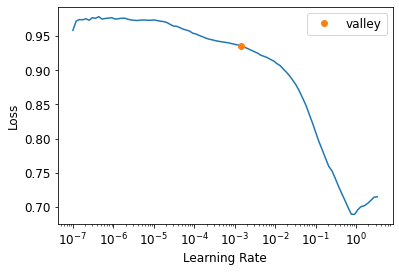

In [26]:
a=learn.lr_find()
a

In [27]:
learn.freeze

<bound method Learner.freeze of <fastai.tabular.learner.TabularLearner object at 0x7fb9a1c64e50>>

In [28]:
learn.fine_tune(5,0.000737800776027143)

epoch,train_loss,valid_loss,amex_metric,matthews_corrcoef,time
0,0.523129,0.479346,0.505626,0.716134,00:34


epoch,train_loss,valid_loss,amex_metric,matthews_corrcoef,time
0,0.370198,0.357983,0.539777,0.736994,00:34
1,0.256633,0.250448,0.561023,0.735659,00:34
2,0.230478,0.231442,0.561332,0.737534,00:34
3,0.218668,0.229906,0.573199,0.733334,00:34
4,0.213774,0.231291,0.564749,0.732725,00:33


In [29]:
learn.unfreeze

<bound method Learner.unfreeze of <fastai.tabular.learner.TabularLearner object at 0x7fb9a1c64e50>>

In [30]:
learn.fit(150,0.00001)

epoch,train_loss,valid_loss,amex_metric,matthews_corrcoef,time
0,0.210452,0.232202,0.564760,0.732576,00:33
1,0.211783,0.233292,0.562928,0.731992,00:34
2,0.207702,0.234365,0.562733,0.732327,00:33
3,0.209339,0.235567,0.559776,0.731110,00:34
4,0.206552,0.234280,0.563820,0.731807,00:33
5,0.208767,0.235189,0.566894,0.728783,00:32
6,0.205998,0.235617,0.567808,0.726765,00:33
7,0.205235,0.236053,0.567719,0.727458,00:33
8,0.201547,0.237373,0.557874,0.726788,00:33
9,0.205306,0.238269,0.556107,0.726929,00:33


In [31]:
learn.fine_tune(10,0.000137800776027143)

epoch,train_loss,valid_loss,amex_metric,matthews_corrcoef,time
0,0.122184,0.412504,0.494976,0.673110,00:34


epoch,train_loss,valid_loss,amex_metric,matthews_corrcoef,time
0,0.065752,0.523194,0.476920,0.653044,00:34
1,0.075170,0.546728,0.500624,0.685607,00:34
2,0.087278,0.505511,0.486118,0.665518,00:34
3,0.082998,0.496388,0.485426,0.665955,00:33
4,0.074874,0.523103,0.462313,0.640563,00:34
5,0.062895,0.546023,0.491276,0.668542,00:34
6,0.052541,0.575498,0.477522,0.654321,00:34
7,0.042041,0.594399,0.480257,0.659368,00:34
8,0.035945,0.596982,0.483993,0.659704,00:34
9,0.033790,0.600053,0.481729,0.660771,00:34


SuggestedLRs(valley=3.0199516913853586e-05)

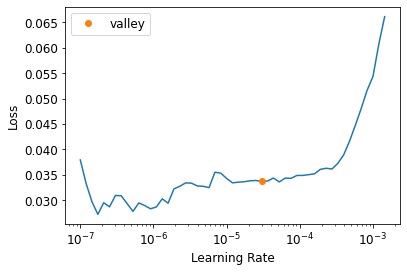

In [32]:
learn.lr_find()


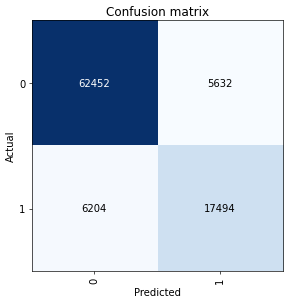

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [34]:
del interp
gc.collect()

19480

In [35]:
pred_vals=[]
test_df=pd.read_csv("../input/d/bhavesjain/amex-default-prediction/test-last-rows.csv")


In [36]:
test_df.shape
#924621

(924621, 150)

In [37]:
test_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,S_5,S_6,D_54,R_4,B_12,S_8,D_55,D_56,R_5,D_58,S_9,B_14,D_59,D_60,D_61,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,B_24,R_7,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_25,S_26,D_102,D_103,D_105,D_107,B_36,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-10-12,0.568930,0.121385,0.010779,1.009347,0.006923,0.149413,0.000396,0.003576,0.007398,0.006787,0.124780,0.025111,0.050187,0.007511,0.445881,0.489448,0.517214,0.024945,1.008730,NaN,0.333484,0.005263,0.109464,0.115930,0.560515,0.033599,0.011795,0.003473,1.007686,0.005607,0.058696,0.464023,0.458377,NaN,0.005444,0.381320,0.016998,0.008621,0.424651,0.013835,0.589184,1.767255,0.049326,CR,U,0.001363,0.002311,NaN,0.590569,0.003994,0.004525,6.0,0.187650,0.002591,0.555903,0.006617,0.008136,0.007281,0.006583,0.281546,0.008804,0.300419,0.147274,0.964865,0.007062,0.005943,0.005402,0.009328,0.001973,0.008972,0.008869,0.009269,0.006064,0.007288,0.003654,0.000554,0.000375,0.007410,1.006677,0.140051,0.007856,0.007447,0.006869,0.001841,0.003837,0.000871,0.0,0.009057,0.009205,0.005639,0.005024,1,0.003337,0.004120,0.007153,0.005336,0.004212,0.007244,0.008678,0.000612,0.003235,0.003137,1.006260,0.005644,0.000724,0.008165,0.005954,0.004624,0.980107,0.135788,0.970630,0.080587,0.003999,0.003953,NaN,0.000153,0.001118,1.002286,2.0,0.000151,1.007009,0.375581,0.346436,0.009603,0.0,0.251319,0.0,-1.0,0.247260,1.0,0.199254,0.144025,0.004272,0.009896,0.000478,0.0,0.009689,0.001736,0.009961,0.006789,0.004902,0.000975,0.006273,0.008816,0.005912,0.001250,0.003690,0.003219
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,2019-04-15,0.841177,0.126475,0.016562,1.009245,0.009715,0.112195,0.006192,0.011386,NaN,0.004234,0.014831,0.099732,0.135907,0.002269,0.445957,0.362383,0.041712,0.182720,1.008640,NaN,0.001505,0.017454,0.008152,0.143998,0.525659,0.298735,0.009336,0.005253,1.003089,0.008385,0.054184,0.768435,0.053444,0.063766,0.004132,0.006375,0.018508,0.010847,0.608682,0.685577,0.046726,0.128330,0.330806,CO,O,0.000348,0.091107,NaN,1.005304,0.003039,0.000821,6.0,0.190710,0.009712,0.283946,0.004334,0.001395,0.001878,0.003787,0.010397,0.007238,0.107488,0.004756,0.005312,0.008168,0.006781,0.026572,0.005945,0.004499,0.003978,0.001244,0.005311,0.001574,0.005655,0.000168,0.000172,0.005023,0.002403,1.003721,0.008613,0.005523,0.007568,0.005801,0.004484,0.005302,0.002537,0.0,0.009161,0.004240,0.003904,0.007188,1,0.008257,0.004913,0.007181,0.002152,0.002084,0.002205,0.007064,0.001214,0.006069,0.005062,0.006800,0.004039,0.001636,0.005406,0.000981,0.009926,0.928590,0.135659,0.974450,0.020564,0.007385,0.006146,NaN,0.002687,0.007424,1.000501,2.0,0.006356,1.003549,0.005498,0.590974,0.000565,1.0,0.317455,0.0,3.0,0.316734,0.0,0.854850,0.578802,0.000412,0.645458,0.005065,1.0,0.009554,0.999368,0.001249,0.007340,0.001252,0.007632,0.002767,0.008789,0.004344,0.000866,0.000247,0.007780
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,2019-10-16,0.697522,0.002724,0.001484,0.810072,0.002620,0.166165,0.004888,0.015938,0.105303,0.003381,0.417713,0.068810,0.004851,0.000715,0.702994,0.204331,0.522954,0.058534,1.009375,NaN,0.006962,0.008629,0.001312,0.235105,0.566616,0.129189,0.004455,0.001847,1.003348,0.001102,0.052914,0.123005,0.418986,NaN,0.006620,0.272541,0.009170,0.004427,0.153307,0.003803,0.508047,0.889807,0.520753,CR,U,0.006646,0.006028,NaN,0.585974,0.001526,0.001193,4.0,0.185771,0.007611,0.001265,0.007911,0.009446,0.005084,0.258185,0

In [38]:
test_df.fillna(test_df.mode().iloc[0],inplace=True)

In [39]:
test_dl=learn.dls.test_dl(test_df)

In [40]:
gc.collect()

21

In [41]:
predictions = learn.get_preds(dl=test_dl)

In [42]:
import tqdm

In [43]:
for j,i in tqdm.tqdm(predictions[0]):
    pred_vals.append(float(i))

100%|██████████| 924621/924621 [00:07<00:00, 131329.57it/s]


In [44]:
import pandas as pd

In [45]:
del test_df,test_dl
gc.collect()

55

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Count'>

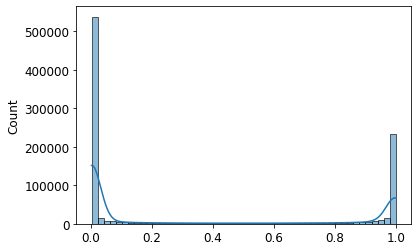

In [47]:
sns.histplot(pred_vals,kde=True)

In [48]:
ss

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c5d60460dba6dedc41e,0
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3a4f0ca3de613b0b2ad,0
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475cb095d2443a68030f1,0
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977822e8b356988ca4d07,0


In [49]:

ss["prediction"]=pred_vals

In [50]:
ss

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.013502
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.973603
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.037225
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.002193
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.324073
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c5d60460dba6dedc41e,0.999992
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3a4f0ca3de613b0b2ad,0.971468
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475cb095d2443a68030f1,0.001504
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977822e8b356988ca4d07,0.949562


In [51]:
ss.to_csv("submission.csv",index=False)